# HaccyTrees Validation
A few statistics to confirm that our merger trees are working and compare reasonably well to previous works (check out Srisawat 2013, Rangel 2020, etc.)

In [2]:
import haccytrees.mergertrees
import numpy as np
import math
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func_haccytrees

plt.rcParams.update({
    "text.usetex": True,
    'font.size': 14,
    "figure.figsize": (6.25, 3.75)
})

pyfftw not available, using numpy fft


In [3]:
%%time
forest, progenitor_array = haccytrees.mergertrees.read_forest(
    '/data/a/cpac/mbuehlmann/LastJourney/forest/target_forest_aurora.hdf5',
    'LastJourney', nchunks=1, chunknum=0, #mass_threshold = 2.7*10**11,
    include_fields = ["tree_node_mass", "snapnum", "fof_halo_tag", "sod_halo_cdelta", "fof_halo_center_x", "fof_halo_center_y", "fof_halo_center_z"]
)

CPU times: user 6.67 s, sys: 8.56 s, total: 15.2 s
Wall time: 15.2 s


In [4]:
%%time
fg_forest, fg_progenitor_array = haccytrees.mergertrees.read_forest(
    "/data/a/cpac/mbuehlmann/LastJourney/forest/fg_forest.hdf5",
    'LastJourney',
    #mass_threshold=5e11 # Is this for mergers, or "particle size"? (might be the wrong word)
)

CPU times: user 22.7 s, sys: 40.5 s, total: 1min 3s
Wall time: 1min 3s


### Establish Globals

In [5]:
sim = haccytrees.Simulation.simulations['LastJourney']
redshifts = np.flip(sim.step2z(np.array(sim.cosmotools_steps)))
print(redshifts)
xaxis = 'z_nums'
my_range = [10**13, 10**14]
my_range_str = ["{:.2e}".format(my_range[0]), "{:.2e}".format(my_range[1])]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
# Convert snapshots to redshifts -- opposite order (chronological)
redshifts = np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00])
print(redshifts)

[2.22044605e-16 2.44648318e-02 5.01567398e-02 7.48663102e-02
 1.00766703e-01 1.27946128e-01 1.53846154e-01 1.83745583e-01
 2.12303981e-01 2.42274413e-01 2.70543616e-01 3.03501946e-01
 3.34661355e-01 3.63636364e-01 4.01673640e-01 4.33666191e-01
 4.71449488e-01 5.02242152e-01 5.39050536e-01 5.77708006e-01
 6.18357488e-01 6.55683690e-01 6.94772344e-01 7.35751295e-01
 7.78761062e-01 8.23956443e-01 8.64564007e-01 9.14285714e-01
 9.59064327e-01 1.00598802e+00 1.05521472e+00 1.10691824e+00
 1.15203426e+00 1.20879121e+00 1.25842697e+00 1.32101617e+00
 1.37588652e+00 1.43341404e+00 1.49379653e+00 1.54430380e+00
 1.61038961e+00 1.68000000e+00 1.73841962e+00 1.79944290e+00
 1.87965616e+00 1.94721408e+00 2.01801802e+00 2.09230769e+00
 2.17034700e+00 2.25242718e+00 2.31683168e+00 2.40677966e+00
 2.47750865e+00 2.57651246e+00 2.65454545e+00 2.73605948e+00
 2.85057471e+00 2.94117647e+00 3.03614458e+00 3.10204082e+00
 3.20502092e+00 3.31330472e+00 3.42731278e+00 3.54751131e+00
 3.63133641e+00 3.763033

## Mass Matching - Narrow Bins

In [6]:
# Make masks
fg_masks = help_func_haccytrees.make_masks(fg_forest)
print(len(forest['tree_node_mass'][forest['snapnum'] == 100]))
halo_masks = help_func_haccytrees.make_masks(forest) # Forest should already only contain values in these bins
print(len(halo_masks[0][halo_masks[0]]) + len(halo_masks[1][halo_masks[1]]) + len(halo_masks[2][halo_masks[2]]))

307993
307993


### Find QH Candidates

In [7]:
qh_masks = []
for this_mask in (fg_masks):
    fg_idx = np.nonzero(this_mask)[0]
    mainbranch_index, mainbranch_masses = help_func_haccytrees.get_branches(fg_idx, fg_forest)
    mainbranch_mergers = help_func_haccytrees.get_mainbranch_mergers(fg_forest, fg_progenitor_array, mainbranch_index)
    major_mergers = help_func_haccytrees.get_major_mergers(mainbranch_mergers)
    lmm_redshift = help_func_haccytrees.get_lmms(major_mergers)
    fgs, qhs, mrich = help_func_haccytrees.find_specials(fg_forest, mainbranch_index, major_mergers, lmm_redshift, fg_idx)
    # This qhs index will be an index associated with this specific mass bin/this fg mask. Is there any reason to have a mask version? Maybe, because of later...
    qh_mask = np.zeros_like(this_mask)
    qh_mask[qhs] = 1
    qh_masks.append(qh_mask)

### Testing HaccyTrees 
(go find that cell in the other ntbk if you need -- just remember that there's a quick way to get the mainbhance index if that's all you need, without going through get branches)

## Mass Growth Rates

[array([        0,       380,      1141, ..., 203919799, 203920411,
       203921102]), array([   431902,    432894,    434120, ..., 204025419, 204026299,
       204027138]), array([   516514,    518391,    520611, ..., 204037591, 204039442,
       204041298])]
3
bin n:  0
bin n:  1
bin n:  2


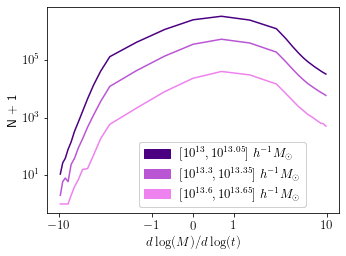

In [18]:
#target_idx = help_func_haccytrees.bin_halos(forest, mbins)
target_idx = [np.nonzero(halo_masks[0])[0], np.nonzero(halo_masks[1])[0], np.nonzero(halo_masks[2])[0]]
colors = iter(["indigo", "mediumorchid", "violet"])
print(target_idx)
print(len(target_idx))
mainbranch_index, mainbranch_mass = help_func_haccytrees.get_binned_branches(target_idx, forest)
alphas = help_func_haccytrees.calc_mass_growth_rate_binned(mainbranch_mass)
bin_labels = [r"$[10^{13}, 10^{13.05}]$ $h^{-1}M_\odot$", r"$[10^{13.3}, 10^{13.35}]$ $h^{-1}M_\odot$", r"$[10^{13.6}, 10^{13.65}]$ $h^{-1}M_\odot$"]
#bin_labels = ["1", "2", "3"]
fig, ax = help_func_haccytrees.plot_mass_growth_rates(alphas, bin_labels = bin_labels, n_hist_bins = 30, zoom = True, log = True, cust_citer = colors) # Why is this so weird? Default should be 10, but 12 looks enormous...
fig.tight_layout() # Why is this throwing an error?
fig.savefig("full_lj_plots/mass_growth_rates.png", bbox_inches='tight', pad_inches=0)

This shape looks much better when we use the `mass_threshold` condition in `read_forest()`! Probably because we don't have so many poorly resolved halos, messing with statistics. (Why would having more poorly resolved halos cause this alpha distribution plot to look different? Specifically, slightly too high on the LHS?) 

## Main Branch Lengths

Can't do this with Rangel Bins currently, because we don't have all those bins (for all the halos)

/home/acossairt/miniconda3/envs/fossil_groups_env/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


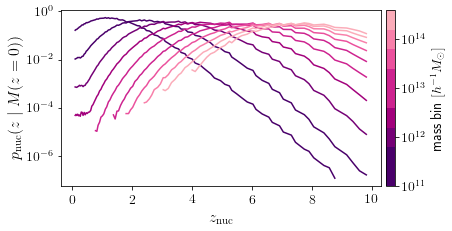

In [30]:
# Same thing, but find at what redshift the halos begin/are first identified
# then find the probability that a halo was "created" between z and z + dz

# Load data
lengths_bins = np.load('/data/a/cpac/mbuehlmann/LastJourney/forest/z0_mainbranchlength.npz')

# redshifts of simulation steps
sim = haccytrees.Simulation.simulations['LastJourney']
zsteps = sim.step2z(np.array(sim.cosmotools_steps))

# Create array of z differences between timesteps
dz = zsteps[:-1] - zsteps[1:]

# remove lengths 0 and 100 (since we don't know in what dz the halos formed 
# that existed in the first timestep)
length_counts = lengths_bins['bin_counts'][:, 1:-1]
zsteps = zsteps[1:]

# Reduce number of mass bins (from 40 to 10)
length_counts = np.array(
    [np.sum([length_counts[i+j] for j in range(4)], axis=0)
     for i in range(0, 40, 4)])
mass_bins = lengths_bins['mass_bins'][np.linspace(0, 40, 10, endpoint=False).astype(int)]

# Change "length of mainprog branch" to "timestep when halo was discovered"
t_dis_counts = length_counts[:, ::-1].astype(np.float32)

# remove low-z part
t_dis_counts = t_dis_counts[:, :-4]
zsteps = zsteps[:-4]
dz = dz[:-4]

# Make a nice colormap (if this were sns, I would use 'rocket')
cmap = cm.get_cmap('RdPu', len(t_dis_counts))
colors = cmap(np.linspace(1, 0, len(t_dis_counts) + 4)[:-4]) # cheap trick to avoid light pink
color_edges = mass_bins
tick_edges = [11, 12, 13, 14, 15] # currently hardcoded
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list('blablabla', colors, cmap.N)
norm = plt.matplotlib.colors.BoundaryNorm(color_edges, cmap.N)

# plot
fig, (ax, cax) = plt.subplots(1, 2, figsize=(6, 3.25), gridspec_kw=dict(wspace=0.03, width_ratios=[1, 0.03]))
for i in range(len(t_dis_counts)):
    #print(i)
    n_halos =  np.sum(t_dis_counts[i])
    mask = t_dis_counts[i] > 10
    t_dis_normed = t_dis_counts[i]/dz/n_halos
    ax.plot(zsteps[mask], t_dis_normed[mask], color=colors[i])
ax.set(yscale='log')

# Cosmetics
cb = plt.matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, ticks=tick_edges, boundaries=color_edges)
cb.set_ticklabels([f'$10^{{{m}}}$' for m in tick_edges])
cb.ax.tick_params(labelsize=14)
cb.set_label('mass bin $[h^{-1}M_\odot]$')
ax.set_yscale('log')
ax.set_xlabel(r"$z_\mathrm{nuc}$", fontsize = 16)
ax.set_ylabel(r"$p_\mathrm{nuc}(z \; | \; M(z=0))$", fontsize = 16)

#ax.margins(x=0.01)
fig.tight_layout()
fig.savefig("full_lj_plots/mainprog_branch_lengths_z.pdf", bbox_inches='tight', pad_inches=0, dpi=300)